In [1]:
#Basic necessary Libraries
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Apriori libraries 
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
groceries = pd.read_excel('final_data.xlsx')
groceries

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


,NO.TRANSAKSI,DATE,DESCRIPTION,QTY
0,2301011000001,2023-01-01,MADU NSTR SUPER 650ML.,1
1,2301011000001,2023-01-01,STELLA MTC F/C 225ML.REF /12,1
2,2301011000001,2023-01-01,GELAS KOPI BOLA@50,2
3,2301011000001,2023-01-01,MIKA BX IV,3
4,2301011000002,2023-01-01,LAGIE GOLD CM 75G.W/30 LG07507,2
...,...,...,...,...
21929,2312311020099,2023-12-31,INDOMIE SOTO MIE/40 SM,1
21930,2312311020099,2023-12-31,INDOMIE KARI AYAM/40 IKA,1
21931,2312311020099,2023-12-31,INDOMIE KALDU AYAM/40 KA75,3
21932,2312311020099,2023-12-31,SEDAAP MIE KOREAN SPCY40-20234,1


In [3]:
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NO.TRANSAKSI  21934 non-null  int64         
 1   DATE          21934 non-null  datetime64[ns]
 2   DESCRIPTION   21934 non-null  object        
 3   QTY           21934 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 685.6+ KB


In [4]:
#Renaming the columns to simple words
groceries.rename(columns = {'NO.TRANSAKSI':'id','DESCRIPTION':'item'}, inplace = True)

In [5]:
#Convert the 'Date' column to datetime format
groceries['DATE']= pd.to_datetime(groceries['DATE'])
 
#Extracting year,month and day
groceries['year'] = groceries['DATE'].apply(lambda x : x.year)
groceries['month'] = groceries['DATE'].apply(lambda x : x.month)
groceries['day'] = groceries['DATE'].apply(lambda x : x.day)
groceries['weekday'] = groceries['DATE'].apply(lambda x : x.weekday())

#Rearranging the columns
groceries=groceries[['id', 'DATE','year', 'month', 'day','weekday','item']]
groceries.head()

,id,DATE,year,month,day,weekday,item
0,2301011000001,2023-01-01,2023,1,1,6,MADU NSTR SUPER 650ML.
1,2301011000001,2023-01-01,2023,1,1,6,STELLA MTC F/C 225ML.REF /12
2,2301011000001,2023-01-01,2023,1,1,6,GELAS KOPI BOLA@50
3,2301011000001,2023-01-01,2023,1,1,6,MIKA BX IV
4,2301011000002,2023-01-01,2023,1,1,6,LAGIE GOLD CM 75G.W/30 LG07507


In [6]:
#Creating temporary data which has quantity purchased column
temp=groceries.copy()
temp['qty_purchased']=groceries['id'].map(groceries['id'].value_counts())

#Creating sparse matrix 
basket = (temp.groupby(['id', 'item'])['qty_purchased']
          .sum().unstack().reset_index().fillna(0)
          .set_index('id'))

#Eoding the quantity urchased
def encode(x):
    '''Encoding the quantity of products with 0s and 1s
    0:when qty is less than or equal to 0
    1:when qty is greater than or equal to 1'''
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
#Appying on our data
basket_sets = basket.applymap(encode)
basket_sets

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5768\2613186608.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode)


item,3M MASKER RESPIRATOR@1/20.3283,ABC ALK A2-2 LR06-2B+1B 5078,ABC ALK LR03 4B+2B/72 2184,ABC ALK LR06 2B MP/12 484,ABC ALK LR06 4B+2R9/72 2183,ABC ALKALINE A2-4 LR6/72 4149,ABC ALKALINE A3-2 LR03 5079,ABC BAT BIRU CZ R20/12 456,ABC BAT BIRU R14-2/72 457,ABC BAT BIRU R6-12/24 480,...,ZWITSAL BB MYK TLON 250ML. /12,ZWITSAL BB NAT M.TELON 60ML,ZWITSAL COL FLO KISS 100/24.32,ZWITSAL EAU DE TOILETTE 100/12,ZWITSAL H/LOT ALOE V.200ML /18,ZWITSAL HAIR LOT ALMD.100ML/24,ZWITSAL SHP ALOE 100ML /36,ZWITSAL SOAP 4X70G/36 67557840,ZWITSAL SOAP CLSS.70G/144.7872,ZWITSAL SOAP R/HONEY 70G. /144
id,,,,,,,,,,,,,,,,,,,,,
2301011000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312311020095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Creating sparse matrix 
basket = (temp.groupby(['id', 'item'])['qty_purchased']
          .sum().unstack().reset_index().fillna(0)
          .set_index('id'))

#Eoding the quantity urchased
def encode(x):
    '''Encoding the quantity of products with 0s and 1s
    0:when qty is less than or equal to 0
    1:when qty is greater than or equal to 1'''
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
#Appying on our data
basket_sets = basket.applymap(encode)
basket_sets

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5768\492910806.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode)


item,3M MASKER RESPIRATOR@1/20.3283,ABC ALK A2-2 LR06-2B+1B 5078,ABC ALK LR03 4B+2B/72 2184,ABC ALK LR06 2B MP/12 484,ABC ALK LR06 4B+2R9/72 2183,ABC ALKALINE A2-4 LR6/72 4149,ABC ALKALINE A3-2 LR03 5079,ABC BAT BIRU CZ R20/12 456,ABC BAT BIRU R14-2/72 457,ABC BAT BIRU R6-12/24 480,...,ZWITSAL BB MYK TLON 250ML. /12,ZWITSAL BB NAT M.TELON 60ML,ZWITSAL COL FLO KISS 100/24.32,ZWITSAL EAU DE TOILETTE 100/12,ZWITSAL H/LOT ALOE V.200ML /18,ZWITSAL HAIR LOT ALMD.100ML/24,ZWITSAL SHP ALOE 100ML /36,ZWITSAL SOAP 4X70G/36 67557840,ZWITSAL SOAP CLSS.70G/144.7872,ZWITSAL SOAP R/HONEY 70G. /144
id,,,,,,,,,,,,,,,,,,,,,
2301011000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312311020095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Apriori- Support70%
# frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True)
frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True, low_memory=True)

#Associaton rules-using lift
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets),  min_threshold=1)


print(basket_sets.head())

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


item           3M MASKER RESPIRATOR@1/20.3283  ABC ALK A2-2 LR06-2B+1B   5078  \
id                                                                              
2301011000001                               0                               0   
2301011000002                               0                               0   
2301011000003                               0                               0   
2301011000004                               0                               0   
2301011000005                               0                               0   

item           ABC ALK LR03 4B+2B/72     2184  ABC ALK LR06 2B MP/12     484  \
id                                                                             
2301011000001                               0                              0   
2301011000002                               0                              0   
2301011000003                               0                              0   
2301011000004                   

In [10]:
#Customizable function to change the lift and confidence
def rules_mod(lift,confidence):
    '''rules_mod is a function to control the rules 
    based on lift and confidence threshold'''
    return rules[ (rules['lift'] >= lift) &
      (rules['confidence'] >= confidence) ]

#Calling function
rules_mod(0.7,0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(NUTRIJELL LCI 10G/12 52218),(NUTRIJELL CKL 20G /12/12),0.001407,0.003939,0.001407,1.0,253.857143,1.0,0.001401,inf,0.997464,0.357143,1.0,0.678571
1,(NUTRIJELL LCI 10G/12 52218),(NUTRIJELL GRP 10G/12/12 52204),0.001407,0.002814,0.001407,1.0,355.400000,1.0,0.001403,inf,0.998591,0.500000,1.0,0.750000
2,"(INDOMIE GRG KEBAB RDG GKR, INDOMIE SEBLA...",(INDOMIE GORENG ACEH/40 IMGA),0.001125,0.011818,0.001125,1.0,84.619048,1.0,0.001112,inf,0.989296,0.095238,1.0,0.547619
3,"(INDOMIE SOTO MIE/40 SM, KAPAL GARAM 2...",(INDOMIE GRG SPECIAL/40 GSS),0.001125,0.048959,0.001125,1.0,20.425287,1.0,0.001070,inf,0.952113,0.022989,1.0,0.511494
4,"(SUNLIGHT LIME 650ML.REF/12.108, SEDAAP MIE SO...",(INDOMIE GRG SPECIAL/40 GSS),0.001125,0.048959,0.001125,1.0,20.425287,1.0,0.001070,inf,0.952113,0.022989,1.0,0.511494
5,"(NUTRIJELL GRP 10G/12/12 52204, NUTRIJELL LCI...",(NUTRIJELL CKL 20G /12/12),0.001407,0.003939,0.001407,1.0,253.857143,1.0,0.001401,inf,0.997464,0.357143,1.0,0.678571
6,"(NUTRIJELL CKL 20G /12/12, NUTRIJELL LCI 10G...",(NUTRIJELL GRP 10G/12/12 52204),0.001407,0.002814,0.001407,1.0,355.400000,1.0,0.001403,inf,0.998591,0.500000,1.0,0.750000
7,(NUTRIJELL LCI 10G/12 52218),"(NUTRIJELL GRP 10G/12/12 52204, NUTRIJELL CKL...",0.001407,0.001688,0.001407,1.0,592.333333,1.0,0.001404,inf,0.999718,0.833333,1.0,0.916667
8,"(NUVO SOAP YLOW 72G. 72-60257, NUVO SOAP GRE...",(NUVO SOAP BLUE 72G. 72-60254),0.001407,0.003939,0.001407,1.0,253.857143,1.0,0.001401,inf,0.997464,0.357143,1.0,0.678571
9,"(NUVO SOAP YLOW 72G. 72-60257, NUVO SOAP TOS...",(NUVO SOAP PURPLE 72G. 72-61814),0.001125,0.006753,0.001125,1.0,148.083333,1.0,0.001118,inf,0.994366,0.166667,1.0,0.583333


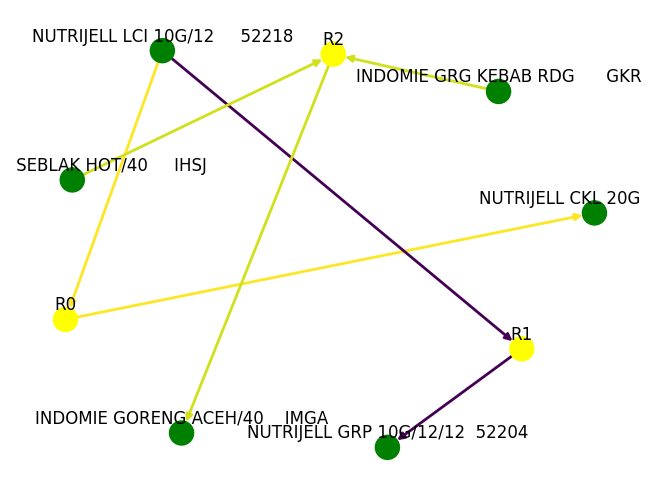

In [11]:
import networkx as nx  
import matplotlib.pyplot as plt
import numpy as np

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map = []
    N = 50  # Membatasi jumlah warna acak
    colors = np.random.rand(N)  # Array warna acak
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']
    
    for i in range(rules_to_show):
        # Menambahkan node untuk setiap rule
        rule_node = "R" + str(i)
        G1.add_node(rule_node)
        
        # Menambahkan edges untuk antecedents (premis) -> rule
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)  # Menambahkan node antecedent
            G1.add_edge(a, rule_node, color=colors[i], weight=2)  # Menghubungkan antecedent ke rule

        # Menambahkan edges untuk rule -> consequents (konsekuen)
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)  # Menambahkan node consequent
            G1.add_edge(rule_node, c, color=colors[i], weight=2)  # Menghubungkan rule ke consequent
    
    # Menentukan warna node
    for node in G1:
        if node in strs:  # Jika node adalah rule node (misalnya R0, R1, ...)
            color_map.append('yellow')
        else:  # Jika node adalah antecedent atau consequent
            color_map.append('green')
    
    # Menentukan warna dan bobot edge
    edges = G1.edges()
    edge_colors = [G1[u][v]['color'] for u, v in edges]
    edge_weights = [G1[u][v]['weight'] for u, v in edges]
    
    # Menata posisi node menggunakan spring_layout
    pos = nx.spring_layout(G1, k=16, scale=1)
    
    # Menggambar graph
    nx.draw(
        G1, pos, node_color=color_map, edge_color=edge_colors, 
        width=edge_weights, font_size=16, with_labels=False
    )
    
    # Menambahkan label node (rule, antecedent, consequent)
    for p in pos:
        pos[p][1] += 0.07  # Mengangkat posisi label agar tidak menutupi node
    nx.draw_networkx_labels(G1, pos)
    
    # Menampilkan graph
    plt.show()

# Menjalankan fungsi dengan 10 aturan pertama
draw_graph(rules, 3)
